In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import uuid
import csv

In [223]:
df = pd.read_csv('/Users/ligrade/Desktop/yandex_data.csv', sep=';')

In [224]:
df.head()

,Ф.И.О. или название образовательного учреждения,Описание профиля,Услуга,Цена за час (в рублях),Описание услуги,Город,Адрес,Ссылка на профиль,Ссылка на Вконтакте,Cсылка на Instagram,Ссылка на Facebook,Ссылка на Profi.ru
0,Елена Любушкина-Кислякова,"С 2004 г. работала в в Юридической фирме ""Прав...",Репетиторы и обучение.\nНаписание юридических ...,500\n3000,"Репетиторы и обучение, лекции, семинары, подго...",Коломна,"Советская площадь, 1",https://yandex.ru/uslugi/profile/ElenaLyubushk...,,,,
1,Никита Александрович Балакирев,Подготовка осуществляется либо очно либо онлай...,Занятие с репетитором по математике.\nПодготов...,2000 \n2000 \n2000 \n2000 \n2000 \n2000 \n2000...,\nЭффективная подготовка к егэ основа...,Казань,улица Академика Кирпичникова,https://yandex.ru/uslugi/profile/NikitaAleksan...,https://vk.com/lifephysic,https://instagram.com/balakirevnikita,https://facebook.com/nikita.balakirev.984,https://profi.ru/profile/BalakirevNA
2,Анастасия Павловна,Программист и преподаватель курсов.\n\nВысшее ...,Занятие с репетитором по математическому анали...,750 \n750 \n750 \n750 \n1200 \n900 \n1200 \n7...,,Ростов-на-Дону,Ворошиловский район,https://yandex.ru/uslugi/profile/AnastasiyaPav...,,,,
3,Наталья Валериевна Сидорова,Предлагаю услуги репетитора начальных классов....,Подготовка к ВПР .\nРепетитор начальных классо...,1500\n1500 \n2000\n140000,Результат моей работы это отличные показатели ...,Москва,метро Динамо,https://yandex.ru/uslugi/profile/NatalyaValeri...,,,,
4,Ольга Кондратьева,Меня зовут Кондратьева Ольга. Я руководитель ц...,Занятие с репетитором по русскому языку как ин...,600 \n600 \n600 \n600 \n600 \n600 \n600,,Москва,Москва,https://yandex.ru/uslugi/profile/OlgaKondratev...,,,,


In [225]:
df = df.rename(columns={'Ф.И.О. или название образовательного учреждения':'name', 
               'Описание профиля':'describe', 
               'Услуга':'service', 
               'Цена за час (в рублях)':'price', 
               'Описание услуги':'service_description',
               'Город':'city', 
               'Адрес':'address', 
               'Ссылка на профиль':'id',
               'Ссылка на Вконтакте':'vk',
               'Ссылка на Instagram':'inst',
               'Ссылка на Facebook':'facebook',
               'Ссылка на Profi.ru':'profi'})

In [226]:
#creating a dataset with selected data
df = df[['id', 'service', 'price', 'city']]
i=0
df['id'] = df['id'].apply(lambda x: uuid.uuid1())
if len(df['id'].unique()) != len(df['id']):
    print('The id values matched')
df['price'] = df['price'].apply(lambda x: x.split())
df['service'] = df['service'].apply(lambda x: x.split('\n'))




In [227]:
#equalization of the number of services and prices
def f(x):   
    count_price = len(x[2])
    count_service = len(x[1])
    if count_service < count_price:
        x[2] = x[2][:count_service]
    elif count_service > count_price:
        x[1] = x[1][:count_price]
    return x
df = df.apply(f, axis=1)

In [228]:
#splitting lines separately for each service
def explode(df, lst_cols, fill_value='', preserve_index=False):
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]

    idx_cols = df.columns.difference(lst_cols)
    lens = df[lst_cols[0]].str.len()  
    idx = np.repeat(df.index.values, lens)
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    
    if (lens == 0).any():
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    res = res.sort_index()
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [229]:
df = explode(df, ['service','price'], fill_value='')

In [230]:
#statistics of registered teachers by city
all_city = df.groupby(['city'], as_index=False)\
        .aggregate({'id':'nunique'})\
        .sort_values('id', ascending = False)
all_city = all_city.rename(columns={'id':'count_teachers'})
all_city = all_city.query('count_teachers > 5')
city_array = all_city['city'].values     
all_city

,city,count_teachers
9,Москва,482
25,Тверь,61
11,Нижний Новгород,61
4,Ивантеевка,61
21,Санкт-Петербург,50
20,Ростов-на-Дону,6


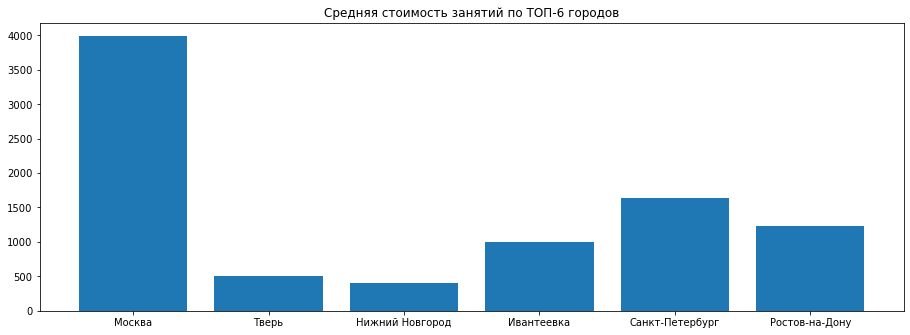

In [209]:
#average cost of a service by city
average_price = {}
for city in city_array:
    city_data = df.query('city == @city')
    average_price[city] = round(pd.to_numeric(city_data['price'], errors='coerce').mean(),2)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(average_price.keys(), average_price.values())
plt.title('Средняя стоимость занятий по ТОП-6 городов')
plt.show()






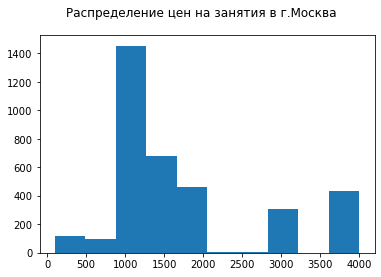

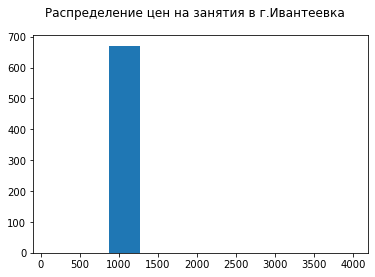

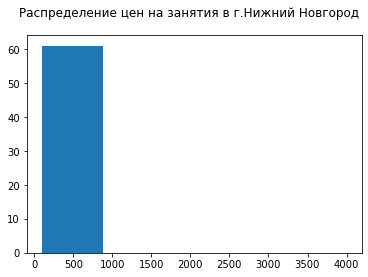

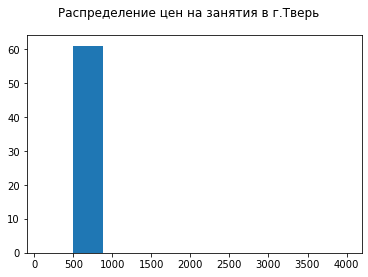

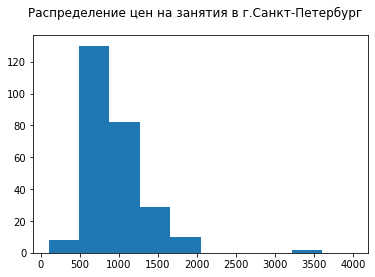

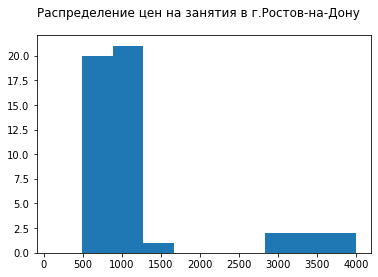

In [211]:
#distribution of cost for each city
for city in city_array:
    city_data = df.query('city == @city')
    plt.hist(x=city_data['price'])
    plt.suptitle('Распределение цен на занятия в г.' + city)
    plt.show

In [221]:
services = np.unique(df[['service']].values)
print('Полный список услуг:')
for i in services:
    print(i)


Полный список услуг:

Russian as foreign language
Ампульный ботокс для волос курсы
Английский для путешественников
Английский. Интенсив
Антитеррористическая защищённость - дистанционное обучение руководителей, специалистов, работников.
Антитеррористическая защищённость - очное обучение в организации, на предприятии.
Безопасность дорожного движения (БДД) - дистанционное обучение водителей и ответственных организаций.
Безопасность дорожного движения (БДД) - очное обучение водителей и ответственных организаций.
Безопасные методы и приемы выполнения работ на высоте - очное обучение работников.
Ботокс для волос обучение.
Вступительный экзамен МГИМО по английскому .
Выполнение работ на высоте Обучение работников безопасным методам и приемам - дистанционное обучение.
ГО и ЧС - курсы очного обучения (36 часов) - в организации, на предприятии.
ГО и ЧС - программа дистанционного обучения для работников, руководителей и специалистов.
Групповое занятие по английскому языку.
ДВИ МГИМО Английский .
